In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset =  pd.read_csv('Social_Network_Ads.csv')

In [3]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
dataset.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [5]:
dataset.duplicated().sum()

0

In [6]:
dataset.drop_duplicates(inplace=True)

In [7]:
dataset = pd.get_dummies(dataset)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
xTrain, xTest, yTrain, yTest = train_test_split(dataset.drop('Purchased', axis=1), dataset['Purchased'], test_size=0.25, random_state=1)

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scScale = StandardScaler()
scScale.fit(xTrain)
xTrain = scScale.transform(xTrain)
xTest = scScale.transform(xTest)

In [12]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [13]:
lr.fit(xTrain, yTrain)

LogisticRegression()

In [14]:
yPred = lr.predict(xTest)

In [15]:
from sklearn.metrics import accuracy_score

In [16]:
print("Accuracy: ", accuracy_score(yTest, yPred)*100)

Accuracy:  81.0


In [17]:
from sklearn.metrics import confusion_matrix

In [18]:
cm = confusion_matrix

In [19]:
cm = confusion_matrix(yTest, yPred)

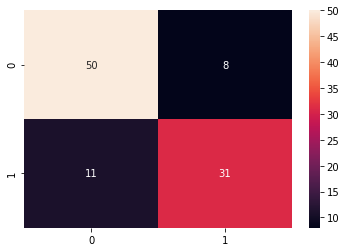

In [25]:
sns.heatmap(cm, annot=True)
plt.show()

In [26]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score, classification_report

In [27]:
#precision = tp/(tp+fp)
print("Precision Score : ", precision_score(yTest, yPred))

Precision Score :  0.7948717948717948


In [28]:
#recall = tp/(tp+fn)
print("Recall Score : ", recall_score(yTest, yPred))

Recall Score :  0.7380952380952381


In [29]:
#f1 = 2 tp /(2 tp+fp+fn)
print("F1 Score : ",f1_score(yTest, yPred))

F1 Score :  0.7654320987654322


In [ ]:
print(classification_report())